이번 주차 과제는 간단한 이미지 데이터를 활용해 크기가 큰 데이터의 차원 축소를 진행하고 데이터의 라벨에 따라 클러스터링을 진행하는 과제입니다.

###필요한 모듈을 가져오세요.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import torch
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.cluster import DBSCAN
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.mixture import GaussianMixture
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import AgglomerativeClustering

# Image data 가져오기
https://www.kaggle.com/datasets/zalando-research/fashionmnist/data

###위 링크의 fashion mnist 데이터의 train dataset과 test dataset을 가져오세요.
(데이터의 용량이 크니 직접 다운로드 하지 말고 코드를 이용해 가져오도록 해보세요.)

In [2]:
!pip install kaggle

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [4]:
import pandas as pd

# 파일 경로를 직접 입력
df_train = pd.read_csv('C:/Users/LG/Downloads/fashion-mnist_train.csv/fashion-mnist_train.csv')
df_test = pd.read_csv('C:/Users/LG/Downloads/fashion-mnist_test.csv/fashion-mnist_test.csv')

###데이터에 대한 정보들을 보여주세요.
(필수: 요약, 모양, 크기, 결측치 여부 등)

In [5]:
df_train.describe()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
count,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,...,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.00000
mean,4.500000,0.000900,0.006150,0.035333,0.101933,0.247967,0.411467,0.805767,2.198283,5.682000,...,34.625400,23.300683,16.588267,17.869433,22.814817,17.911483,8.520633,2.753300,0.855517,0.07025
std,2.872305,0.094689,0.271011,1.222324,2.452871,4.306912,5.836188,8.215169,14.093378,23.819481,...,57.545242,48.854427,41.979611,43.966032,51.830477,45.149388,29.614859,17.397652,9.356960,2.12587
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
25%,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
50%,4.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
75%,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,58.000000,9.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
max,9.000000,16.000000,36.000000,226.000000,164.000000,227.000000,230.000000,224.000000,255.000000,254.000000,...,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,170.00000


In [6]:
df_train.shape
df_train.size

47100000

In [7]:
if np.sum(df_train.isnull().sum()) == 0:
  print('결측치 없음')
else:
  print('결측치 있음')

결측치 없음


In [8]:
df_test.describe()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,...,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000
mean,4.500000,0.000400,0.010300,0.052100,0.077000,0.208600,0.349200,0.826700,2.321200,5.457800,...,34.320800,23.071900,16.432000,17.870600,22.860000,17.790200,8.353500,2.541600,0.629500,0.06560
std,2.872425,0.024493,0.525187,2.494315,2.208882,4.669183,5.657849,8.591731,15.031508,23.359019,...,57.888679,49.049749,42.159665,44.140552,51.706601,45.128107,28.765769,16.417363,7.462533,1.93403
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
25%,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
50%,4.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
75%,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,55.000000,6.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.00000
max,9.000000,2.000000,45.000000,218.000000,185.000000,227.000000,223.000000,247.000000,218.000000,244.000000,...,254.000000,252.000000,255.000000,255.000000,255.000000,255.000000,240.000000,225.000000,205.000000,107.00000


In [9]:
df_test.shape
df_test.size

7850000

In [10]:
if np.sum(df_test.isnull().sum()) == 0:
  print('결측치 없음')
else:
  print('결측치 있음')

결측치 없음


### Data중 첫 번째 이미지를 보여주세요.

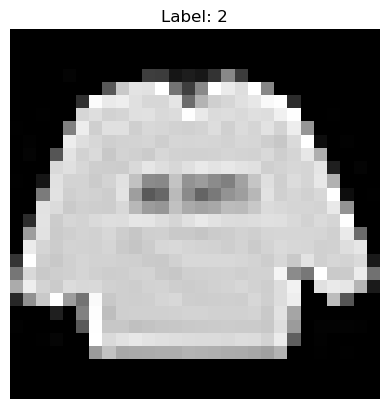

In [11]:
# 이미지 데이터와 라벨 분리
# 보통 첫 번째 열은 'label'이고 나머지는 픽셀 값으로 되어 있습니다.
labels = df_train.iloc[:, 0]  # 첫 번째 열이 라벨일 경우
images = df_train.iloc[:, 1:].values  # 나머지 열이 이미지 픽셀 값

# 첫 번째 이미지 가져오기 (28x28로 변환)
first_image = images[0].reshape(28, 28)

# 첫 번째 이미지 시각화
plt.imshow(first_image, cmap='gray')
plt.title(f"Label: {labels[0]}")
plt.axis('off')
plt.show()

# 이미지 전처리

### 이미지 데이터를 머신러닝에 이용하기 편한 형태로 바꾸어 합니다.
(torch model 사용 - tensor 형태로 바꾸기 등)

In [12]:
import pandas as pd
import torch
from torch.utils.data import TensorDataset, DataLoader

# 라벨과 이미지 데이터 분리
train_lab = df_train['label'].values               # 라벨 데이터
train_img = df_train.drop(columns=['label']).values # 이미지 데이터

# 이미지를 28x28 형태로 변환 및 텐서로 변환
train_img = train_img.reshape(-1, 1, 28, 28)       # (N, C, H, W) 형태로 변환
images_tensor = torch.tensor(train_img, dtype=torch.float32)  # 이미지 데이터를 float32 텐서로 변환
labels_tensor = torch.tensor(train_lab, dtype=torch.long)     # 라벨 데이터를 long 텐서로 변환

# TensorDataset 및 DataLoader 생성
dataset = TensorDataset(images_tensor, labels_tensor)
dataloader = DataLoader(dataset, batch_size=64, shuffle=True)  # 배치 크기 64로 설정

# 첫 번째 배치 확인 (샘플 확인용)
for images, labels in dataloader:
    print("Image batch dimensions:", images.shape)
    print("Label batch dimensions:", labels.shape)
    break


Image batch dimensions: torch.Size([64, 1, 28, 28])
Label batch dimensions: torch.Size([64])


### 이미지 데이터는 픽셀 값이 0 - 255로 이루어져 있습니다. 이 값을 0 - 1까지의 값으로 normalize 해주세요.

In [13]:

# 라벨과 이미지 데이터 분리
train_lab = df_train['label'].values               # 라벨 데이터
train_img = df_train.drop(columns=['label']).values # 이미지 데이터

# 정규화: 픽셀 값을 255로 나누어 [0, 1] 범위로 변환
train_img = train_img / 255.0

# 이미지를 28x28 형태로 변환 및 텐서로 변환
train_img = train_img.reshape(-1, 1, 28, 28)       # (N, C, H, W) 형태로 변환
images_tensor = torch.tensor(train_img, dtype=torch.float32)  # 이미지 데이터를 float32 텐서로 변환
labels_tensor = torch.tensor(train_lab, dtype=torch.long)     # 라벨 데이터를 long 텐서로 변환

# TensorDataset 및 DataLoader 생성
dataset = TensorDataset(images_tensor, labels_tensor)
dataloader = DataLoader(dataset, batch_size=64, shuffle=True)  # 배치 크기 64로 설정

# 첫 번째 배치 확인 (샘플 확인용)
for images, labels in dataloader:
    print("Image batch dimensions:", images.shape)
    print("Label batch dimensions:", labels.shape)
    print("First image pixel values range:", images[0].min().item(), "-", images[0].max().item())
    break


Image batch dimensions: torch.Size([64, 1, 28, 28])
Label batch dimensions: torch.Size([64])
First image pixel values range: 0.0 - 1.0


### 추가적인 이미지 전처리를 진행해주세요.
(차원을 수정하는 것은 뒤의 문제에서 진행할 것이므로 여기에서 하지 마세요.)

In [14]:
# 라벨과 이미지 데이터 분리
train_lab = df_train['label'].values               # 라벨 데이터
train_img = df_train.drop(columns=['label']).values # 이미지 데이터

# 정규화: 픽셀 값을 255로 나누어 [0, 1] 범위로 변환
train_img = train_img / 255.0

# 표준화: 평균과 표준편차를 계산하여 각 이미지에 적용
mean = train_img.mean()        # 전체 데이터의 평균
std = train_img.std()          # 전체 데이터의 표준편차
train_img = (train_img - mean) / std  # 정규화된 값을 표준화

# Tensor 변환
images_tensor = torch.tensor(train_img, dtype=torch.float32)  # float32 텐서로 변환
labels_tensor = torch.tensor(train_lab, dtype=torch.long)     # long 텐서로 변환

# TensorDataset 및 DataLoader 생성
dataset = TensorDataset(images_tensor, labels_tensor)
dataloader = DataLoader(dataset, batch_size=64, shuffle=True)  # 배치 크기 64로 설정

# 첫 번째 배치 확인 (샘플 확인용)
for images, labels in dataloader:
    print("Image batch dimensions:", images.shape)
    print("Label batch dimensions:", labels.shape)
    print("First image pixel values range after standardization:", images[0].min().item(), "-", images[0].max().item())
    break


Image batch dimensions: torch.Size([64, 784])
Label batch dimensions: torch.Size([64])
First image pixel values range after standardization: -0.8109300136566162 - 2.023446798324585


# 차원 축소
차원 축소란 고차원 데이터를 효율적으로 처리하기 위한 기법입니다.
### 그 중 대표적인 PCA와 t-sne에 대한 내용을 비교하여 아래에 적어주세요.

PCA(Principal Component Analysis)는 고차원의 데이터를 저차원으로 변환하여 주요 특징을 보존하는 선형 기법입니다. 반면, t-SNE(t-distributed Stochastic Neighbor Embedding)는 비선형 기법으로, 데이터의 국소적 유사성을 유지해 고차원 데이터의 구조를 시각적으로 표현하는 데 탁월합니다. PCA는 주로 전체적인 분산을, t-SNE는 데이터 간의 군집을 더 잘 나타냅니다.

## PCA

### 현재 데이터는 28*28로 784차원을 가지고 있습니다. PCA를 이용하여 데이터들을 가장 잘 설명하는 50개의 변수만으로 데이터를 변환하시오.

In [15]:
from sklearn.decomposition import PCA
import pandas as pd


# 라벨과 이미지 데이터 분리
train_img = df_train.drop(columns=['label']).values  # 이미지 데이터
train_lab = df_train['label'].values                 # 라벨 데이터

# PCA 변환: 50개의 주성분으로 차원 축소
pca = PCA(n_components=50)
train_img_pca = pca.fit_transform(train_img)

# 첫 5개의 변환된 데이터 확인
print(train_img_pca[:5])


[[ 9.40014979e+02  1.26493490e+03 -1.30641336e+01 -6.97003948e+02
   9.99056496e+01  2.93040479e+02  2.23353000e+02 -6.54699441e+02
  -2.84169728e+02  2.00495125e+02 -7.61321669e+01 -1.77868796e+02
   4.56296499e+01 -2.47475198e+02 -3.11974566e+02  3.59525636e+02
  -8.59767432e+01  4.23486031e+02 -9.50142091e+01  2.62293896e+02
   4.32057983e+01  2.13970860e+02 -6.96461627e+01  9.98367173e+01
  -2.85139506e+02 -1.19421603e+02  1.11811277e+02 -8.68051736e+01
   1.20764463e+02 -9.98907343e+01 -3.26777683e+02  1.42883300e+02
   4.07187279e+02  3.26833179e+02 -9.59581800e+01  2.41444123e+01
  -2.25402621e+01 -9.02202684e+01  5.22828720e+01  1.31824727e+02
   3.14764656e+02  9.19513959e+01 -2.95206579e+01 -4.05392711e+01
   2.61473894e+01 -3.27609831e+01  2.35579563e+02 -7.53290863e-01
  -9.58170136e+00 -3.56365804e+01]
 [-1.11599076e+03  9.84569965e+02 -4.97105409e+02 -2.04810444e+02
   1.15129828e+02 -1.98891667e+02 -3.13694307e+02 -2.58705462e+02
   3.60168936e+02 -2.51335571e+02 -1.3236

### PCA 이후 데이터들의 설명된 분산 비율 (explained variance ratio)를 출력하세요.

In [16]:
from sklearn.decomposition import PCA
import pandas as pd

# 라벨과 이미지 데이터 분리
train_img = df_train.drop(columns=['label']).values  # 이미지 데이터

# PCA 변환: 50개의 주성분으로 차원 축소
pca = PCA(n_components=50)
train_img_pca = pca.fit_transform(train_img)

# 설명된 분산 비율 출력
explained_variance_ratio = pca.explained_variance_ratio_
print("Explained variance ratio for the first 5 components:", explained_variance_ratio[:5])
print("Total explained variance ratio:", explained_variance_ratio.sum())

Explained variance ratio for the first 5 components: [0.29011353 0.17727668 0.060227   0.04970272 0.03839289]
Total explained variance ratio: 0.8625453344036175


### PCA를 시행하면 데이터가 수정되므로 원본 데이터와 차이가 생기게 됩니다. 이때 이 차이를 재구성 오차(Reconstruction Error)라고 합니다. 재구성 오차를 mse(오차제곱합) 방식으로 구하시오.

In [17]:
from sklearn.decomposition import PCA
from sklearn.metrics import mean_squared_error
import pandas as pd

# 이미지 데이터와 라벨 분리
train_img = df_train.drop(columns=['label']).values  # 이미지 데이터

# PCA 적용: 50개의 주성분으로 차원 축소
pca = PCA(n_components=50)
train_img_pca = pca.fit_transform(train_img)

# 축소된 차원을 원래 차원으로 복원
train_img_reconstructed = pca.inverse_transform(train_img_pca)

# 재구성 오차 계산 (MSE 방식)
reconstruction_error = mean_squared_error(train_img, train_img_reconstructed)
print("Reconstruction Error (MSE):", reconstruction_error)


Reconstruction Error (MSE): 776.3707329879752


### 이번에는 PCA를 통해 원본 데이터를 30차원으로 줄이고, explained variance ratio와 reconstructon error를 구하시오.

In [18]:
# 이미지 데이터와 라벨 분리
train_img = df_train.drop(columns=['label']).values  # 이미지 데이터

# PCA 적용: 30개의 주성분으로 차원 축소
pca_30 = PCA(n_components=30)
train_img_pca_30 = pca_30.fit_transform(train_img)

# 설명된 분산 비율 계산
explained_variance_ratio_30 = pca_30.explained_variance_ratio_
total_explained_variance_30 = explained_variance_ratio_30.sum()
print("Explained variance ratio for first 5 components:", explained_variance_ratio_30[:5])
print("Total explained variance ratio (30 components):", total_explained_variance_30)

# 축소된 차원을 원래 차원으로 복원
train_img_reconstructed_30 = pca_30.inverse_transform(train_img_pca_30)

# 재구성 오차 계산 (MSE 방식)
reconstruction_error_30 = mean_squared_error(train_img, train_img_reconstructed_30)
print("Reconstruction Error (MSE):", reconstruction_error_30)


Explained variance ratio for first 5 components: [0.29011353 0.17727668 0.060227   0.04970272 0.03839289]
Total explained variance ratio (30 components): 0.8204936613036026
Reconstruction Error (MSE): 1013.8867760148079


### 데이터를 30차원으로 줄인 결과와 50차원으로 줄인 결과에는 어떤 차이가 있습니까?

설명된 분산 비율: 50차원으로 줄였을 때가 더 많은 분산을 설명할 수 있다. 즉, 원본 데이터의 정보를 더 많이 보존하며, 데이터의 전체 구조를 좀 더 정확하게 나타낸다. 차원이 높아질수록 설명된 분산 비율의 합이 커진다.

재구성 오차(Reconstruction Error): 50차원으로 줄였을 때가 30차원으로 줄였을 때보다 재구성 오차가 작다. 이는 50차원으로 복원된 데이터가 원본과 더 비슷하다는 의미로, 정보 손실이 30차원에 비해 적다.

계산 복잡도: 50차원은 30차원보다 더 많은 계산 자원을 필요로 하므로, 처리 속도와 메모리 사용량이 상대적으로 증가할 수 있다.

### 마지막으로 원본 데이터를 2차원으로 줄이고, explained variance ratio와 reconstruction error를 구하시오.

In [19]:
# 이미지 데이터와 라벨 분리
train_img = df_train.drop(columns=['label']).values  # 이미지 데이터

# PCA 적용: 2개의 주성분으로 차원 축소
pca_2 = PCA(n_components=2)
train_img_pca_2 = pca_2.fit_transform(train_img)

# 설명된 분산 비율 계산
explained_variance_ratio_2 = pca_2.explained_variance_ratio_
total_explained_variance_2 = explained_variance_ratio_2.sum()
print("Explained variance ratio for first 2 components:", explained_variance_ratio_2)
print("Total explained variance ratio (2 components):", total_explained_variance_2)

# 축소된 차원을 원래 차원으로 복원
train_img_reconstructed_2 = pca_2.inverse_transform(train_img_pca_2)

# 재구성 오차 계산 (MSE 방식)
reconstruction_error_2 = mean_squared_error(train_img, train_img_reconstructed_2)
print("Reconstruction Error (MSE):", reconstruction_error_2)


Explained variance ratio for first 2 components: [0.29011353 0.17727668]
Total explained variance ratio (2 components): 0.4673902181151143
Reconstruction Error (MSE): 3008.2838219019022


### 2차원으로 축소한 데이터를 시각화하여 보여주세요. 대신 데이터의 label에 따라 색상을 다르게 해주세요.

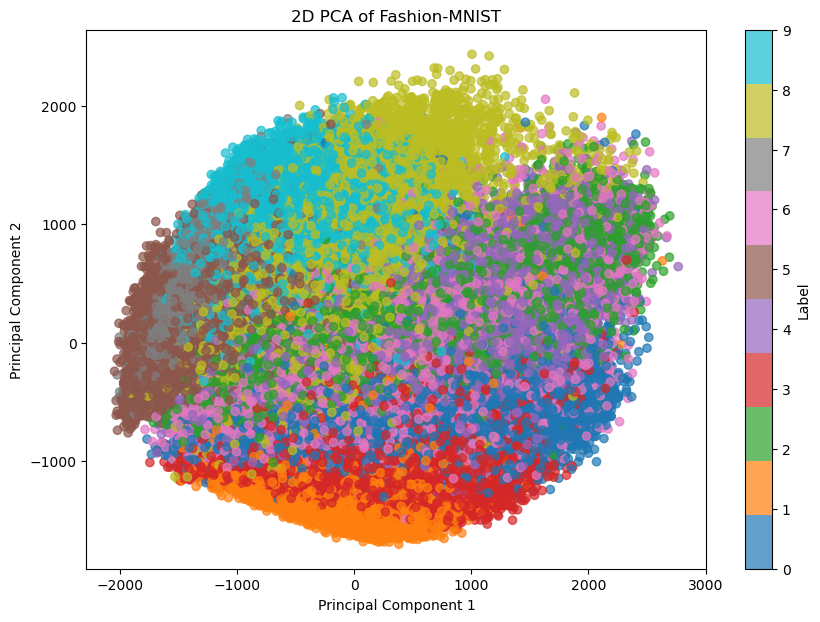

In [20]:
# 이미지 데이터와 라벨 분리
train_img = df_train.drop(columns=['label']).values  # 이미지 데이터
train_lab = df_train['label'].values                 # 라벨 데이터

# PCA 적용: 2개의 주성분으로 차원 축소
pca_2 = PCA(n_components=2)
train_img_pca_2 = pca_2.fit_transform(train_img)

# 시각화
plt.figure(figsize=(10, 7))
scatter = plt.scatter(train_img_pca_2[:, 0], train_img_pca_2[:, 1], c=train_lab, cmap='tab10', alpha=0.7)
plt.colorbar(scatter, label="Label")
plt.title("2D PCA of Fashion-MNIST")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.show()

## T-SNE

### 앞서 pca를 통해 50차원으로 줄인 데이터를 t-sne를 통해 시각화 하세요.

In [27]:
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.cm as cm

In [28]:
# 파일 경로를 직접 입력
df_train = pd.read_csv('C:/Users/LG/Downloads/fashion-mnist_train.csv/fashion-mnist_train.csv')
df_test = pd.read_csv('C:/Users/LG/Downloads/fashion-mnist_test.csv/fashion-mnist_test.csv')


In [29]:
# 이미지 데이터와 라벨 분리
train_img = df_train.drop(columns=['label']).values  # 이미지 데이터
train_lab = df_train['label'].values                 # 라벨 데이터

# PCA 적용: 50개의 주성분으로 차원 축소
pca = PCA(n_components=50)
pca_train = pca.fit_transform(train_img)


In [ ]:
# t-SNE 적용: PCA 결과를 2차원으로 시각화
tsne = TSNE(n_components=2, random_state=42)
train_img_tsne = tsne.fit_transform(train_img_pca_50)

In [ ]:
# 시각화
plt.figure(figsize=(10, 7))
scatter = plt.scatter(train_img_tsne[:, 0], train_img_tsne[:, 1], c=train_lab, cmap='tab10', alpha=0.7)
plt.colorbar(scatter, label="Label")
plt.title("t-SNE visualization of 50D PCA-reduced Fashion-MNIST")
plt.xlabel("t-SNE component 1")
plt.ylabel("t-SNE component 2")
plt.show()


### 앞서 pca를 통해 30차원으로 줄인 데이터를 t-sne를 통해 시각화 하세요.

In [25]:
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.cm as cm


In [ ]:
# 파일 경로를 직접 입력
df_train = pd.read_csv('C:/Users/LG/Downloads/fashion-mnist_train.csv/fashion-mnist_train.csv')
df_test = pd.read_csv('C:/Users/LG/Downloads/fashion-mnist_test.csv/fashion-mnist_test.csv')

# 이미지 데이터와 라벨 분리
train_img = df_train.drop(columns=['label']).values  # 이미지 데이터
train_lab = df_train['label'].values                 # 라벨 데이터

# PCA 적용: 30개의 주성분으로 차원 축소
pca = PCA(n_components=30)
pca_train = pca.fit_transform(train_img)

# t-SNE 적용
tsne = TSNE(random_state=42)
tsne_result = tsne.fit_transform(pca_train)


In [ ]:
# 시각화
plt.figure(figsize=(10, 8))
colors = cm.get_cmap('tab10', 10)  # 10개의 색상을 위한 컬러맵 설정

for i in range(10):  # Fashion-MNIST의 레이블은 0부터 9까지 있음
    plt.scatter(tsne_result[train_lab == i, 0], tsne_result[train_lab == i, 1],
                color=colors(i), label=i, alpha=0.5)

plt.title('t-SNE')
plt.xlabel('Component1')
plt.ylabel('Component2')
plt.legend(title='Labels')
plt.show()

## 군집화

### PCA를 통해 50차원으로 줄인 데이터를 DBSCAN을 이용하여 군집화 하시오.

In [31]:
from sklearn.decomposition import PCA
from sklearn.cluster import DBSCAN
import pandas as pd

# 파일 경로를 직접 입력
df_train = pd.read_csv('C:/Users/LG/Downloads/fashion-mnist_train.csv/fashion-mnist_train.csv')
df_test = pd.read_csv('C:/Users/LG/Downloads/fashion-mnist_test.csv/fashion-mnist_test.csv')

# 이미지 데이터와 라벨 분리
train_img = df_train.drop(columns=['label']).values  # 이미지 데이터
train_lab = df_train['label'].values                 # 라벨 데이터

# PCA 적용: 50개의 주성분으로 차원 축소
pca = PCA(n_components=50)
train_img_pca_50 = pca.fit_transform(train_img)



In [33]:
# DBSCAN을 이용하여 군집화
dbscan = DBSCAN(eps=3, min_samples=5)
clusters = dbscan.fit_predict(train_img_pca_50)


In [35]:
# 군집화 결과 확인
unique_clusters = set(clusters)
print("Unique clusters found:", unique_clusters)
print("Number of clusters (excluding noise):", len(unique_clusters) - (1 if -1 in unique_clusters else 0))
print("Cluster labels:", clusters[:20])  # 첫 20개의 데이터에 대한 클러스터 라벨 출력 (샘플용)


Unique clusters found: {-1}
Number of clusters (excluding noise): 0
Cluster labels: [-1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1]


### k-means를 통해 50차원으로 줄인 데이터를 군집화 하시오.(군집의 개수는 10개로 하시오.)

In [36]:
# 이미지 데이터와 라벨 분리
train_img = df_train.drop(columns=['label']).values  # 이미지 데이터
train_lab = df_train['label'].values                 # 라벨 데이터

# PCA 적용: 50개의 주성분으로 차원 축소
pca = PCA(n_components=50)
train_img_pca_50 = pca.fit_transform(train_img)

# K-means를 이용하여 군집화 (군집의 개수 = 10)
kmeans = KMeans(n_clusters=10, random_state=42)
kmeans_clusters = kmeans.fit_predict(train_img_pca_50)

# 군집화 결과 확인
print("Cluster centers:\n", kmeans.cluster_centers_)
print("Cluster labels for first 20 samples:", kmeans_clusters[:20])  # 첫 20개 데이터에 대한 클러스터 라벨 출력 (샘플용)


Cluster centers:
 [[ 2.43905730e+02  8.04944806e+02  2.20027429e+01  4.04542928e+02
   1.02602561e+03 -4.93482822e+02  3.85192354e+02 -8.96813881e+01
   1.26785205e+02  3.38326402e+01 -3.29118301e+01  2.66695003e+01
  -5.87758909e+01 -3.98158283e+01  5.52927686e+01  1.67996077e+01
  -5.98295274e+00 -1.22927478e+02  2.10133607e+01 -5.54461932e+01
  -8.17687844e+00  2.09946713e+01  6.47172528e+01 -1.79374939e-01
  -4.70155457e+01  6.04204092e+00  7.89533355e+00 -9.81085906e+00
   5.09600992e+00  1.67691120e+01 -1.27440039e+01 -4.31859356e-01
  -1.00113772e+01 -1.12246259e+01  7.94670326e+00  7.61987648e+00
  -7.12264420e+00  3.03462994e+01 -2.96778590e+01  1.39064370e+01
   4.32200348e+00 -9.33812931e-01  1.18287815e+01 -3.82071467e+00
  -4.68507489e+00 -1.25563044e+00  2.78044826e+00 -9.44324866e+00
  -7.02934308e+00 -6.60773275e+00]
 [-1.47845303e+03 -2.06465625e+02  3.12439441e+02  3.48497823e+02
  -9.61596777e+01  3.88425722e+01 -8.39758589e+00 -7.48941257e+01
  -5.75712176e+01  1.19

### 엘보우 메소드를 이용하여 k-means에서 가장 적절한 군집의 개수를 구하시오.

In [37]:
# 이미지 데이터와 라벨 분리
train_img = df_train.drop(columns=['label']).values  # 이미지 데이터

# PCA 적용: 50개의 주성분으로 차원 축소
pca = PCA(n_components=50)
train_img_pca_50 = pca.fit_transform(train_img)

# 엘보우 메소드를 위한 SSE (Sum of Squared Errors) 계산
sse = []
k_range = range(1, 15)  # 1부터 14까지의 클러스터 개수 시도
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(train_img_pca_50)
    sse.append(kmeans.inertia_)  # 군집 내 거리의 제곱합 (SSE)


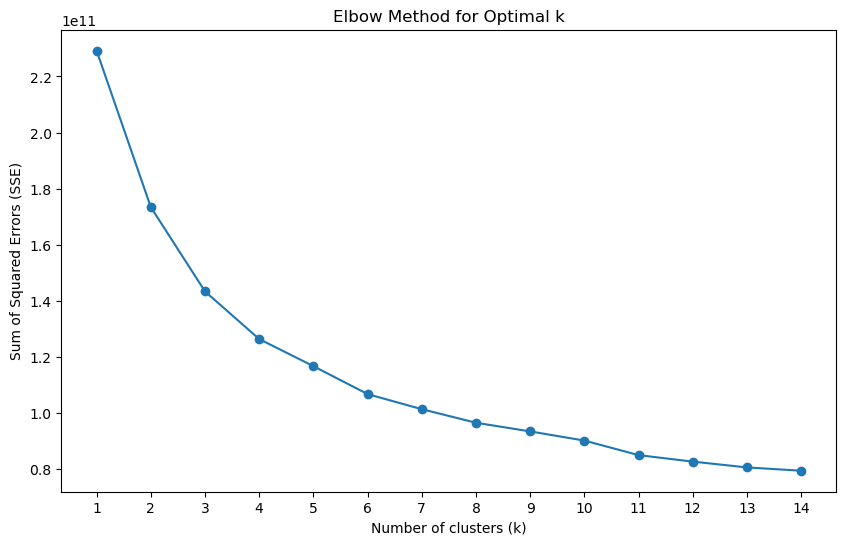

In [38]:
# 엘보우 그래프 시각화
plt.figure(figsize=(10, 6))
plt.plot(k_range, sse, marker='o')
plt.xlabel("Number of clusters (k)")
plt.ylabel("Sum of Squared Errors (SSE)")
plt.title("Elbow Method for Optimal k")
plt.xticks(k_range)
plt.show()

### k-means 최적의 군집 개수로 다시 군집화 하여 시각화 하시오.

In [41]:
# 이미지 데이터와 라벨 분리
train_img = df_train.drop(columns=['label']).values  # 이미지 데이터

# PCA 적용: 50개의 주성분으로 차원 축소
pca = PCA(n_components=50)
train_img_pca_50 = pca.fit_transform(train_img)

# 최적의 군집 개수를 엘보우 메소드에서 확인한 후 지정 
optimal_k = 10

# K-means 클러스터링
kmeans_optimal = KMeans(n_clusters=optimal_k, random_state=42)
clusters = kmeans_optimal.fit_predict(train_img_pca_50)

# PCA로 2차원으로 다시 축소하여 시각화
pca_2d = PCA(n_components=2)
train_img_pca_2d = pca_2d.fit_transform(train_img_pca_50)


C:\Users\LG\AppData\Local\Temp\ipykernel_16968\1319749178.py:3: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colors = cm.get_cmap('tab10', optimal_k)


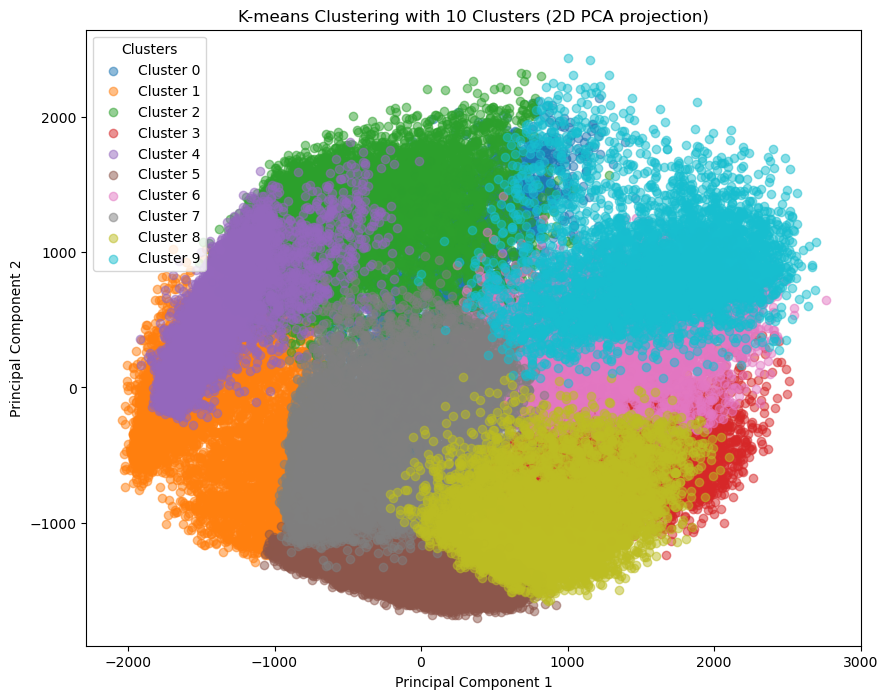

In [40]:
# 시각화
plt.figure(figsize=(10, 8))
colors = cm.get_cmap('tab10', optimal_k)

for i in range(optimal_k):
    plt.scatter(train_img_pca_2d[clusters == i, 0], train_img_pca_2d[clusters == i, 1], 
                color=colors(i), label=f'Cluster {i}', alpha=0.5)

plt.title(f'K-means Clustering with {optimal_k} Clusters (2D PCA projection)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Clusters')
plt.show()

### 다른 추가적인 군집화 기법을 2가지 이상 사용하여 pca 50 데이터를 시각화 하시오.

In [ ]:
# 이미지 데이터와 라벨 분리
train_img = df_train.drop(columns=['label']).values  

# PCA 적용: 50개의 주성분으로 차원 축소
pca = PCA(n_components=50)
train_img_pca_50 = pca.fit_transform(train_img)

# DBSCAN 적용
dbscan = DBSCAN(eps=3, min_samples=5)
dbscan_clusters = dbscan.fit_predict(train_img_pca_50)

# Agglomerative Clustering 적용
agglo = AgglomerativeClustering(n_clusters=10)
agglo_clusters = agglo.fit_predict(train_img_pca_50)

# PCA를 통해 2차원으로 시각화용 차원 축소
pca_2d = PCA(n_components=2)
train_img_pca_2d = pca_2d.fit_transform(train_img_pca_50)


In [ ]:
# 시각화용 컬러맵 설정
colors = cm.get_cmap('tab10', 10)

# DBSCAN 결과 시각화
plt.figure(figsize=(10, 6))
for i in set(dbscan_clusters):
    plt.scatter(train_img_pca_2d[dbscan_clusters == i, 0], train_img_pca_2d[dbscan_clusters == i, 1],
                label=f'Cluster {i}', alpha=0.5)
plt.title("DBSCAN Clustering (2D PCA projection)")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.legend(title="Clusters")
plt.show()

# Agglomerative Clustering 결과 시각화
plt.figure(figsize=(10, 6))
for i in range(10):
    plt.scatter(train_img_pca_2d[agglo_clusters == i, 0], train_img_pca_2d[agglo_clusters == i, 1],
                color=colors(i), label=f'Cluster {i}', alpha=0.5)
plt.title("Agglomerative Clustering (2D PCA projection)")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.legend(title="Clusters")
plt.show()

## 군집화 결과 비교

### 앞선 모든 군집화 모델의 결과를 실루엣 점수(Silhouette score)를 이용하여 성능을 비교하시오.

In [ ]:
# 이미지 데이터와 라벨 분리
train_img = df_train.drop(columns=['label']).values  # 이미지 데이터

# PCA 적용: 50개의 주성분으로 차원 축소
pca = PCA(n_components=50)
train_img_pca_50 = pca.fit_transform(train_img)

# K-means (최적 k=10) 군집화 및 실루엣 점수 계산
kmeans = KMeans(n_clusters=10, random_state=42)
kmeans_labels = kmeans.fit_predict(train_img_pca_50)
kmeans_silhouette = silhouette_score(train_img_pca_50, kmeans_labels)

# DBSCAN 군집화 및 실루엣 점수 계산
dbscan = DBSCAN(eps=3, min_samples=5)
dbscan_labels = dbscan.fit_predict(train_img_pca_50)
# DBSCAN에서 노이즈(-1) 제거하고 실루엣 점수 계산
if len(set(dbscan_labels)) > 1:  # 클러스터가 2개 이상일 때만 계산
    dbscan_silhouette = silhouette_score(train_img_pca_50, dbscan_labels)
else:
    dbscan_silhouette = 'N/A'  # 노이즈만 있을 경우 계산 불가

# Agglomerative Clustering (n_clusters=10) 군집화 및 실루엣 점수 계산
agglo = AgglomerativeClustering(n_clusters=10)
agglo_labels = agglo.fit_predict(train_img_pca_50)
agglo_silhouette = silhouette_score(train_img_pca_50, agglo_labels)


In [ ]:
# 결과 출력
print("Silhouette Score for K-means (k=10):", kmeans_silhouette)
print("Silhouette Score for DBSCAN:", dbscan_silhouette)
print("Silhouette Score for Agglomerative Clustering (n_clusters=10):", agglo_silhouette)


### 실루엣 점수를 통해 군집화 모델의 성능에 대한 간단한 해석을 적으세요.

실루엣 점수는 각 데이터 포인트가 자신의 클러스터 내에서 얼마나 밀집되어 있으며 다른 클러스터와 얼마나 분리되어 있는지를 나타내는 지표입니다. 점수 범위는 -1에서 1 사이이며, 1에 가까울수록 잘 형성된 군집을 의미합니다.

높은 실루엣 점수 (0.5 이상): 해당 모델은 군집 간의 경계가 뚜렷하고, 클러스터 내부의 데이터가 밀집되어 있어 군집화가 잘 이루어진 것으로 해석됩니다. 예를 들어, K-means의 점수가 높다면, 군집 중심 기반의 군집화가 데이터에 적합함을 의미합니다.

낮은 실루엣 점수 (0.2 이하): 클러스터 경계가 모호하거나 데이터가 잘 분리되지 않은 상태를 의미합니다. 예를 들어, DBSCAN의 점수가 낮다면, 밀도 기반의 군집화가 데이터에 적합하지 않거나, 적절한 eps와 min_samples 설정이 필요함을 나타낼 수 있습니다.

중간 실루엣 점수 (0.2 ~ 0.5): 클러스터링이 어느 정도 이루어졌지만, 일부 클러스터가 겹쳐져 있거나 군집 간 분리가 완벽하지 않은 경우로 해석됩니다. Agglomerative Clustering이 이 범위에 있다면, 데이터 구조가 계층적 군집화에 적합하지 않을 가능성이 있습니다.